In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, chi2_contingency, pearsonr
from scipy.stats import chi2_contingency, f_oneway, kruskal
import os, sys
import warnings
warnings.filterwarnings('ignore')
import sys
import os
# Add project root to PYTHONPATH
sys.path.append(os.path.abspath(".."))
# Corrected
from src.dataset import DatasetProcessor
from src.plots import univariate_analysis_numerical, univariate_analysis_categorical, bivariate_num_vs_num, bivariate_num_vs_cat, bivariate_cat_vs_cat, multivariate_analysis

In [ ]:
df = pd.read_csv('food-delivery-time-prediction/data/raw/Food_Delivery_Data.csv')


In [155]:
# Initialize the processor
processor = DatasetProcessor()

# Clean the data (fit and transform)
df_clean = processor.fit_transform(df)

2025-11-09 14:58:51,855 INFO - Fitting DatasetProcessor on training data...


2025-11-09 14:58:53,307 INFO - Fitted iterative imputer on numeric columns: ['Delivery_person_Age', 'Delivery_person_Ratings']
2025-11-09 14:58:53,577 INFO - Fitted iterative imputer on coordinate columns: ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
2025-11-09 14:58:53,602 INFO - Learned categorical distribution for City: 3 values
2025-11-09 14:58:53,619 INFO - Learned categorical distribution for Weatherconditions: 6 values
2025-11-09 14:58:53,633 INFO - Learned categorical distribution for Road_traffic_density: 4 values
2025-11-09 14:58:53,646 INFO - Learned categorical distribution for Festival: 2 values
2025-11-09 14:58:53,658 INFO - Learned categorical distribution for Type_of_order: 4 values
2025-11-09 14:58:53,671 INFO - Learned categorical distribution for Type_of_vehicle: 4 values


In [156]:
df_clean.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1.0,No,Metropolitian,30


In [157]:
# Separate numerical and categorical columns
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)



Numerical Columns:
 ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken(min)']

Categorical Columns:
 ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


--- Univariate Analysis: Time_taken(min) (Numerical) ---

Statistical Summary:
count      45593.0
mean     26.294607
std       9.383806
min           10.0
25%           19.0
50%           26.0
75%           32.0
max           54.0
Name: Time_taken(min), dtype: Float64

Shapiro-Wilk Test: Stat=0.974, p-value=0.000
-> The data is likely not normally distributed (reject H0).


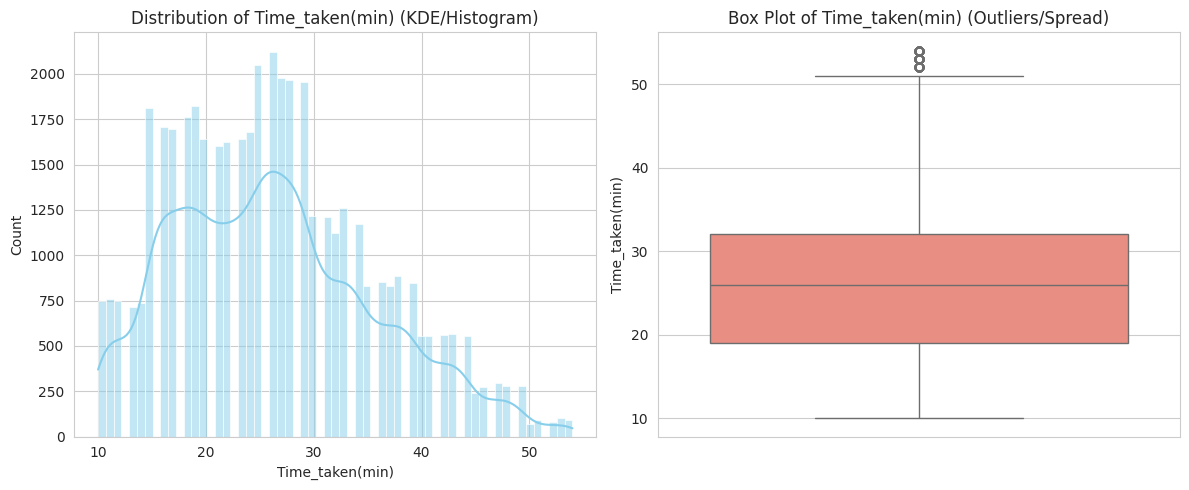

In [158]:
univariate_analysis_numerical(df_clean,'Time_taken(min)')

--- Univariate Analysis: Delivery_person_Age (Numerical) ---

Statistical Summary:
count    45593.000000
mean        29.586737
std          5.684797
min         20.000000
25%         25.000000
50%         29.586737
75%         34.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

Shapiro-Wilk Test: Stat=0.958, p-value=0.000
-> The data is likely not normally distributed (reject H0).


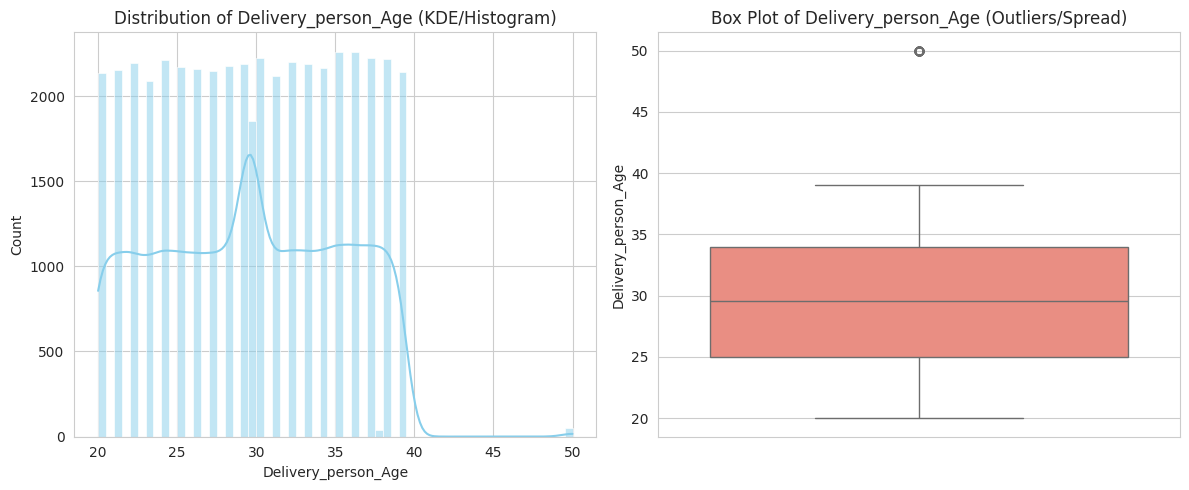

In [159]:
univariate_analysis_numerical(df_clean,'Delivery_person_Age')

--- Univariate Analysis: Delivery_person_Ratings (Numerical) ---

Statistical Summary:
count    45593.000000
mean         4.631949
std          0.324347
min          1.000000
25%          4.500000
50%          4.700000
75%          4.800000
max          5.000000
Name: Delivery_person_Ratings, dtype: float64

Shapiro-Wilk Test: Stat=0.803, p-value=0.000
-> The data is likely not normally distributed (reject H0).


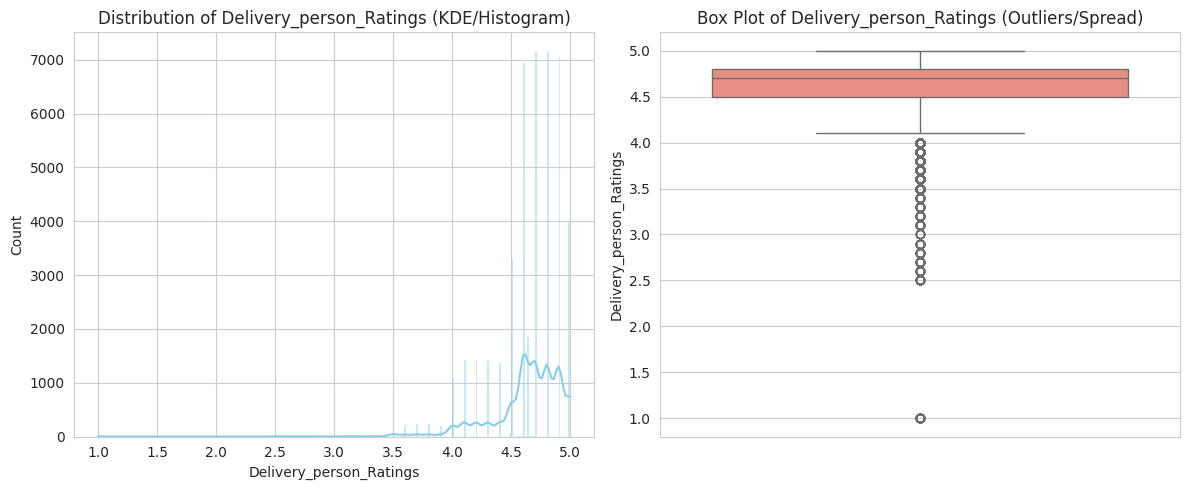

In [160]:
univariate_analysis_numerical(df_clean,'Delivery_person_Ratings')

--- Univariate Analysis: Restaurant_latitude (Numerical) ---

Statistical Summary:
count    45593.000000
mean        18.911400
std          5.244871
min          9.957144
25%         13.029198
50%         18.911400
75%         22.732225
max         30.914057
Name: Restaurant_latitude, dtype: float64

Shapiro-Wilk Test: Stat=0.948, p-value=0.000
-> The data is likely not normally distributed (reject H0).


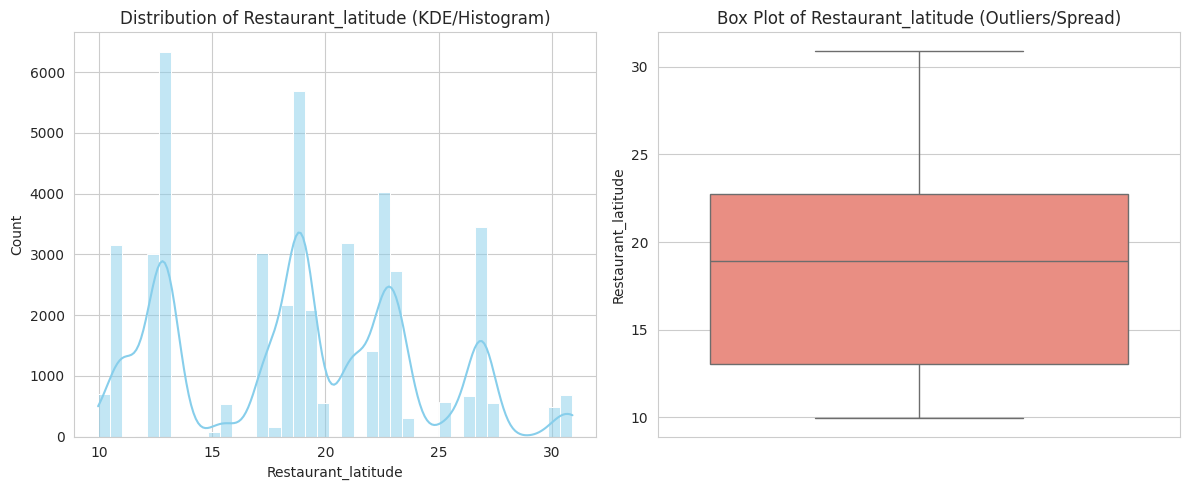

In [161]:
univariate_analysis_numerical(df_clean,'Restaurant_latitude')

--- Univariate Analysis: Restaurant_longitude (Numerical) ---

Statistical Summary:
count    45593.000000
mean        76.923410
std          3.360163
min         72.716909
25%         73.915367
50%         76.659264
75%         78.046106
max         88.433452
Name: Restaurant_longitude, dtype: float64

Shapiro-Wilk Test: Stat=0.873, p-value=0.000
-> The data is likely not normally distributed (reject H0).


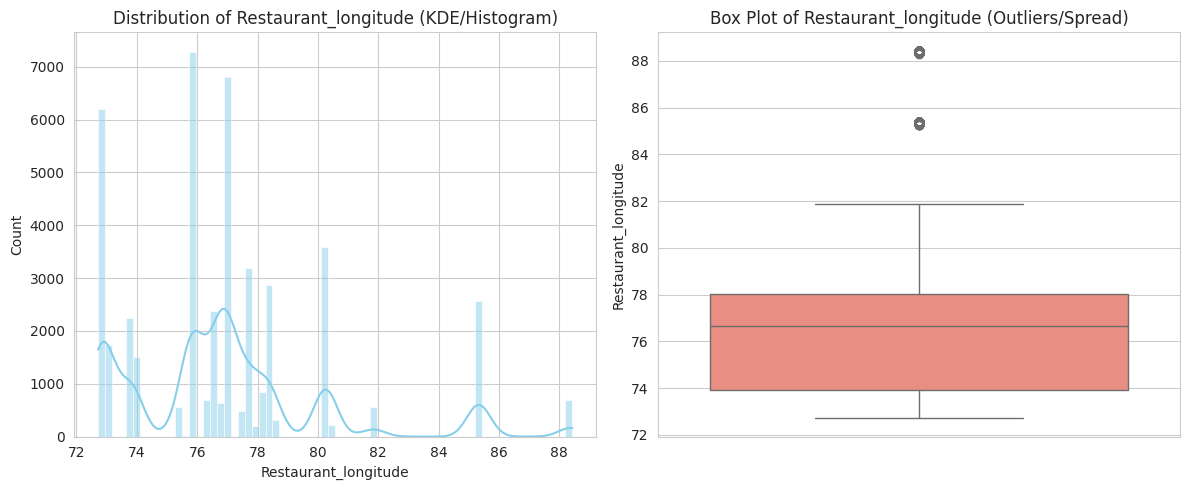

In [162]:
univariate_analysis_numerical(df_clean,'Restaurant_longitude')

--- Univariate Analysis: Delivery_location_latitude (Numerical) ---

Statistical Summary:
count    45593.000000
mean        18.975064
std          5.246731
min          9.967144
25%         13.095801
50%         18.975064
75%         22.785049
max         31.054057
Name: Delivery_location_latitude, dtype: float64

Shapiro-Wilk Test: Stat=0.949, p-value=0.000
-> The data is likely not normally distributed (reject H0).


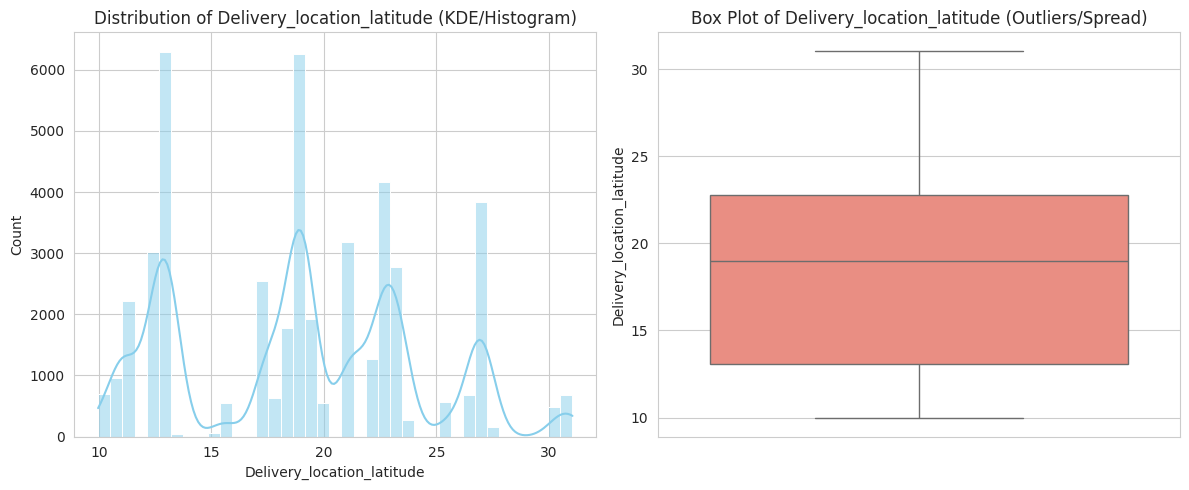

In [163]:
univariate_analysis_numerical(df_clean,'Delivery_location_latitude')

--- Univariate Analysis: Delivery_location_longitude (Numerical) ---

Statistical Summary:
count    45593.000000
mean        76.987074
std          3.360324
min         72.778726
25%         74.006619
50%         76.740028
75%         78.107044
max         88.563452
Name: Delivery_location_longitude, dtype: float64

Shapiro-Wilk Test: Stat=0.874, p-value=0.000
-> The data is likely not normally distributed (reject H0).


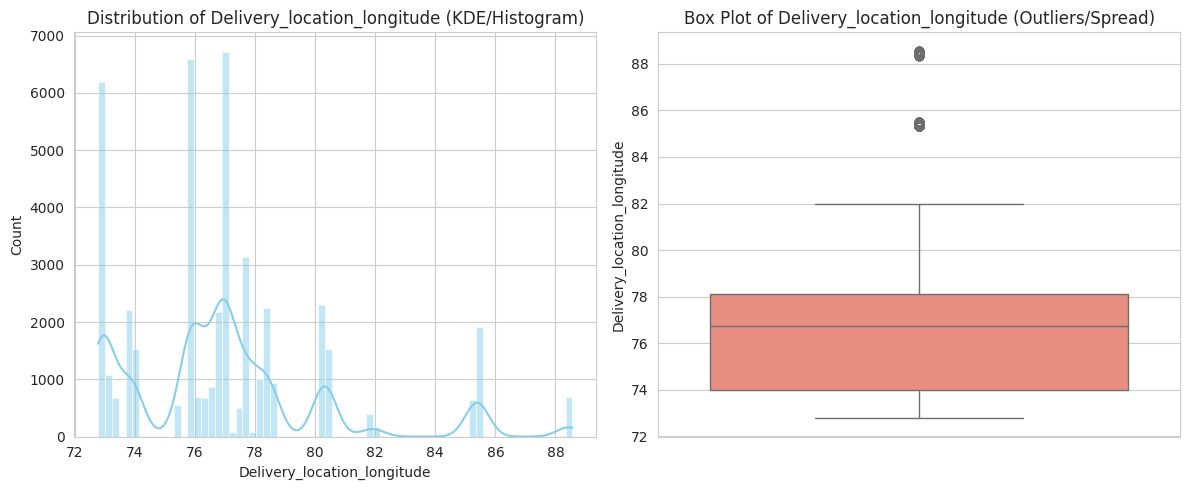

In [164]:
univariate_analysis_numerical(df_clean,'Delivery_location_longitude')

--- Univariate Analysis: Vehicle_condition (Numerical) ---

Statistical Summary:
count    45593.000000
mean         1.023359
std          0.839065
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Vehicle_condition, dtype: float64

Shapiro-Wilk Test: Stat=0.817, p-value=0.000
-> The data is likely not normally distributed (reject H0).


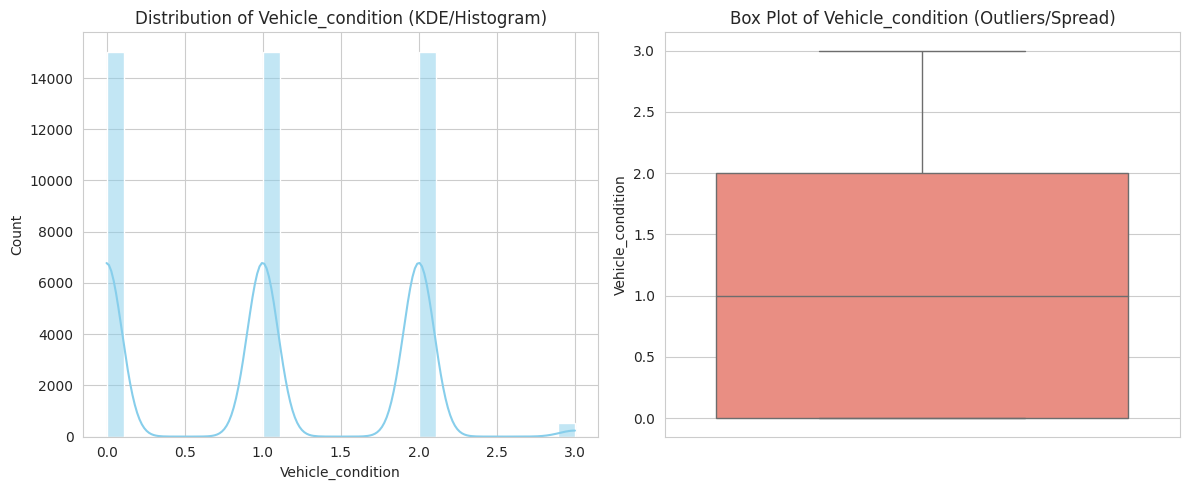

In [165]:
univariate_analysis_numerical(df_clean,'Vehicle_condition')

--- Univariate Analysis: multiple_deliveries (Numerical) ---

Statistical Summary:
count    45593.000000
mean         0.750225
std          0.567430
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: multiple_deliveries, dtype: float64

Shapiro-Wilk Test: Stat=0.714, p-value=0.000
-> The data is likely not normally distributed (reject H0).


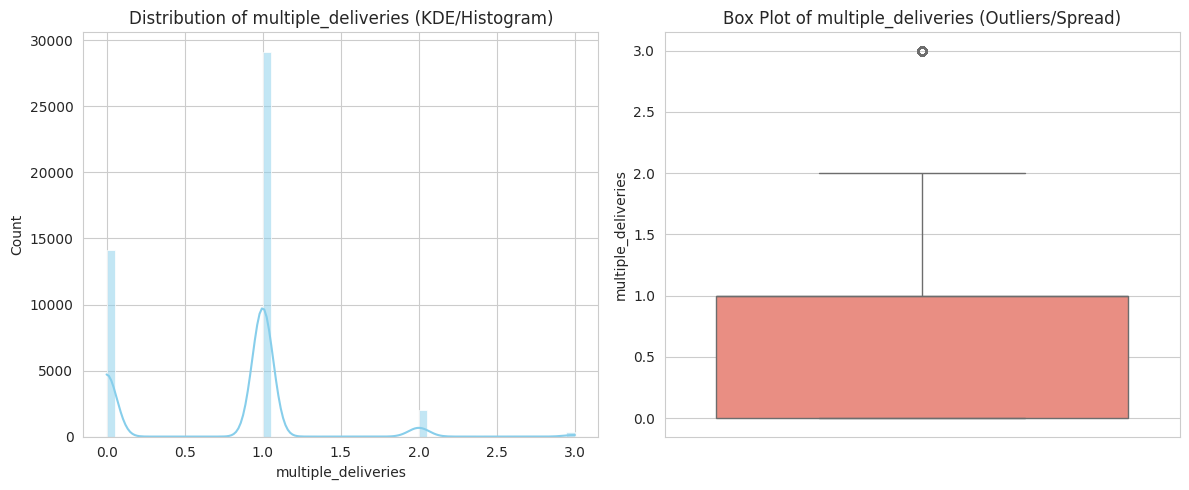

In [166]:
univariate_analysis_numerical(df_clean,'multiple_deliveries')


--- Univariate Analysis: Weatherconditions (Categorical) ---

Statistical Summary (Top 10 Value Counts):
Weatherconditions
Fog           7771
Stormy        7679
Cloudy        7642
Sandstorms    7599
Windy         7522
Sunny         7380
Name: count, dtype: int64

Proportions (%):

Weatherconditions
Fog           17.04
Stormy        16.84
Cloudy        16.76
Sandstorms    16.67
Windy         16.50
Sunny         16.19
Name: proportion, dtype: float64


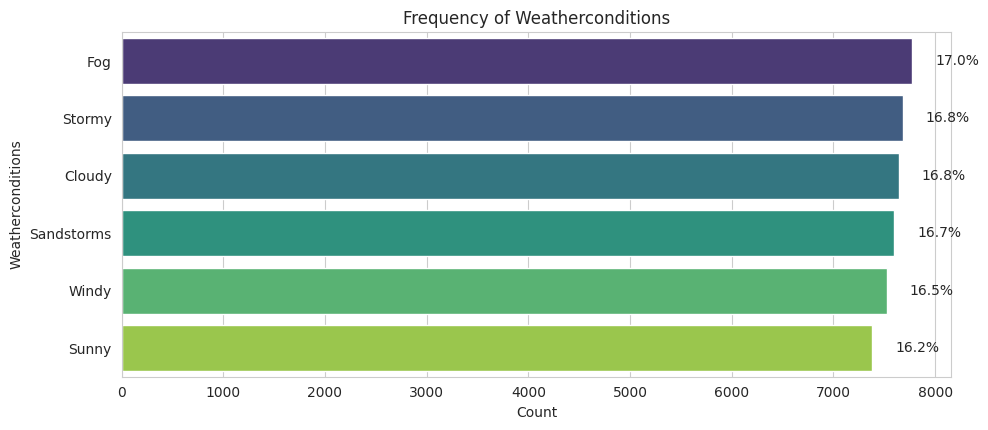

--------------------------------------------------


In [167]:
univariate_analysis_categorical(df_clean,'Weatherconditions')


--- Univariate Analysis: Road_traffic_density (Categorical) ---

Statistical Summary (Top 10 Value Counts):
Road_traffic_density
Low       15676
Jam       14346
Medium    11095
High       4476
Name: count, dtype: int64

Proportions (%):

Road_traffic_density
Low       34.38
Jam       31.47
Medium    24.33
High       9.82
Name: proportion, dtype: float64


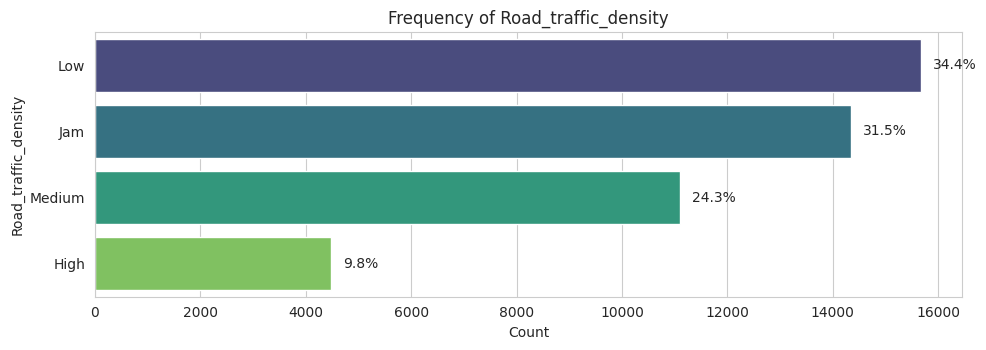

--------------------------------------------------


In [168]:
univariate_analysis_categorical(df_clean,'Road_traffic_density')


--- Univariate Analysis: Type_of_order (Categorical) ---

Statistical Summary (Top 10 Value Counts):
Type_of_order
Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: count, dtype: int64

Proportions (%):

Type_of_order
Snack     25.30
Meal      25.13
Drinks    24.83
Buffet    24.74
Name: proportion, dtype: float64


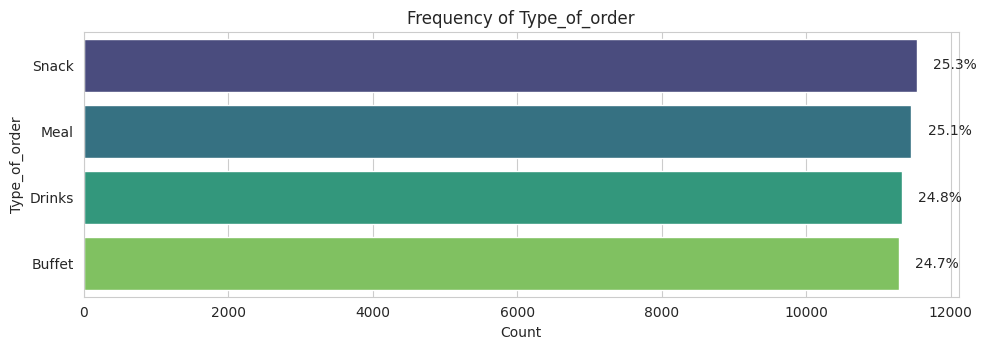

--------------------------------------------------


In [169]:
univariate_analysis_categorical(df_clean,'Type_of_order')


--- Univariate Analysis: Type_of_vehicle (Categorical) ---

Statistical Summary (Top 10 Value Counts):
Type_of_vehicle
Motorcycle          26435
Scooter             15276
Electric_Scooter     3814
Bicycle                68
Name: count, dtype: int64

Proportions (%):

Type_of_vehicle
Motorcycle          57.98
Scooter             33.51
Electric_Scooter     8.37
Bicycle              0.15
Name: proportion, dtype: float64


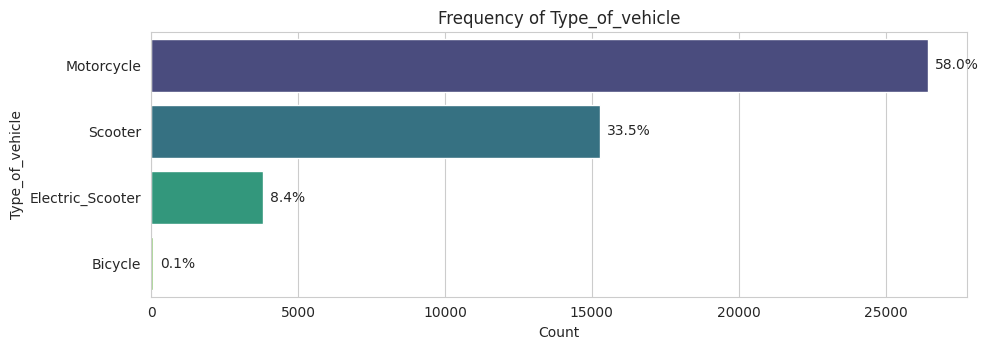

--------------------------------------------------


In [170]:
univariate_analysis_categorical(df_clean,'Type_of_vehicle')


--- Univariate Analysis: Festival (Categorical) ---

Statistical Summary (Top 10 Value Counts):
Festival
No     44692
Yes      901
Name: count, dtype: int64

Proportions (%):

Festival
No     98.02
Yes     1.98
Name: proportion, dtype: float64


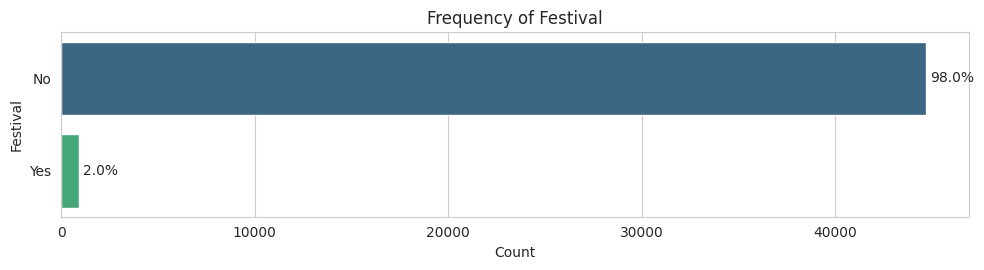

--------------------------------------------------


In [171]:
univariate_analysis_categorical(df_clean,'Festival')


--- Univariate Analysis: City (Categorical) ---

Statistical Summary (Top 10 Value Counts):
City
Metropolitian    35003
Urban            10422
Semi-Urban         168
Name: count, dtype: int64

Proportions (%):

City
Metropolitian    76.77
Urban            22.86
Semi-Urban        0.37
Name: proportion, dtype: float64


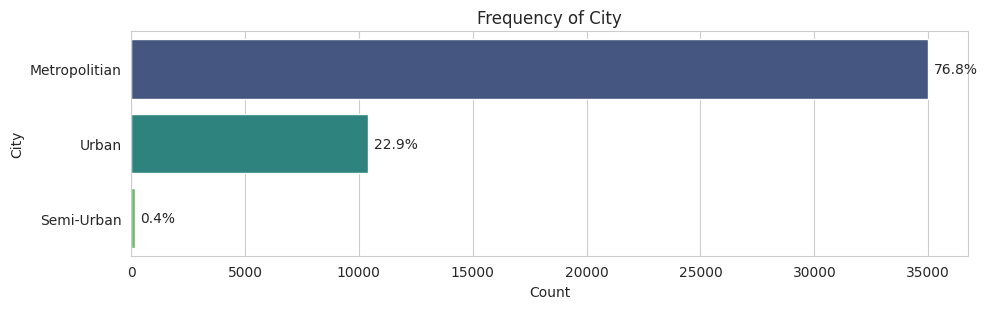

--------------------------------------------------


In [172]:
univariate_analysis_categorical(df_clean,'City')


--- Bivariate Analysis: Time_taken(min) by Weatherconditions ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 599.379, p-value: 0.000e+00
-> INSIGHT: The mean/median of **Time_taken(min)** is **significantly different** across the categories of **Weatherconditions** (Reject H0).

Grouped Mean, Median, and Std Dev of Time_taken(min):
                        mean  median        std
Weatherconditions                              
Fog                28.890233    28.0  10.125781
Cloudy             28.889165    28.0  10.079147
Windy              26.109279    26.0   8.623152
Sandstorms         25.893275    26.0   8.632691
Stormy             25.864435    26.0   8.485311
Sunny              21.924526    20.0   8.360564


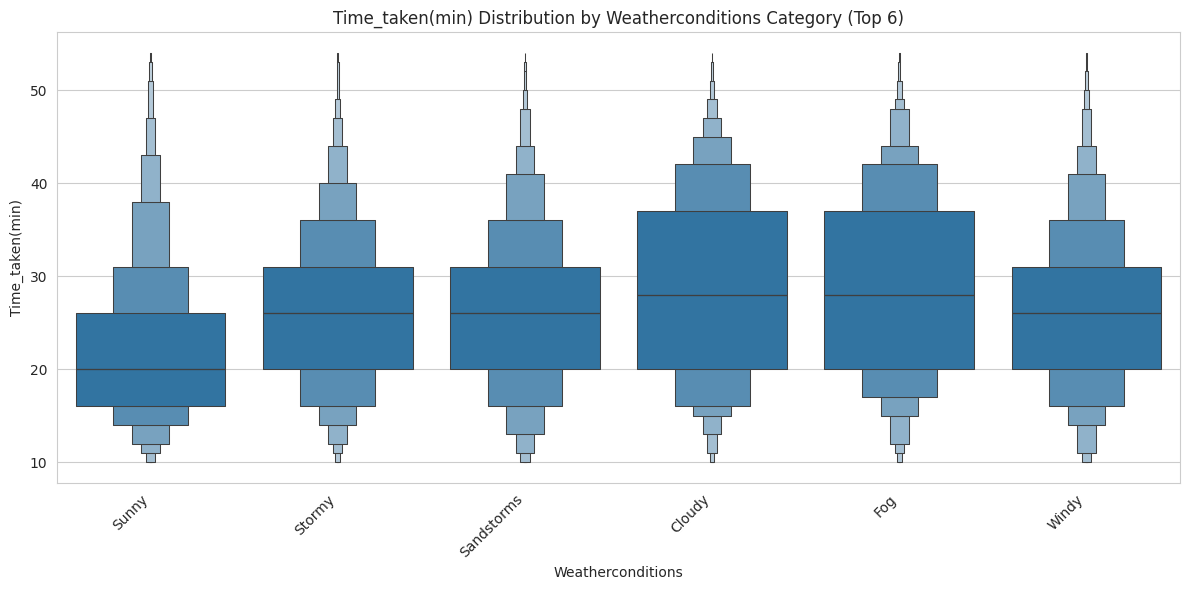

In [173]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','Weatherconditions')


--- Bivariate Analysis: Time_taken(min) by Road_traffic_density ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 3357.043, p-value: 0.000e+00
-> INSIGHT: The mean/median of **Time_taken(min)** is **significantly different** across the categories of **Road_traffic_density** (Reject H0).

Grouped Mean, Median, and Std Dev of Time_taken(min):
                           mean  median       std
Road_traffic_density                             
Jam                    31.11146    31.0  9.951632
High                  27.241063    27.0  8.404294
Medium                 26.71032    27.0  8.576956
Low                   21.321957    20.0  6.849375


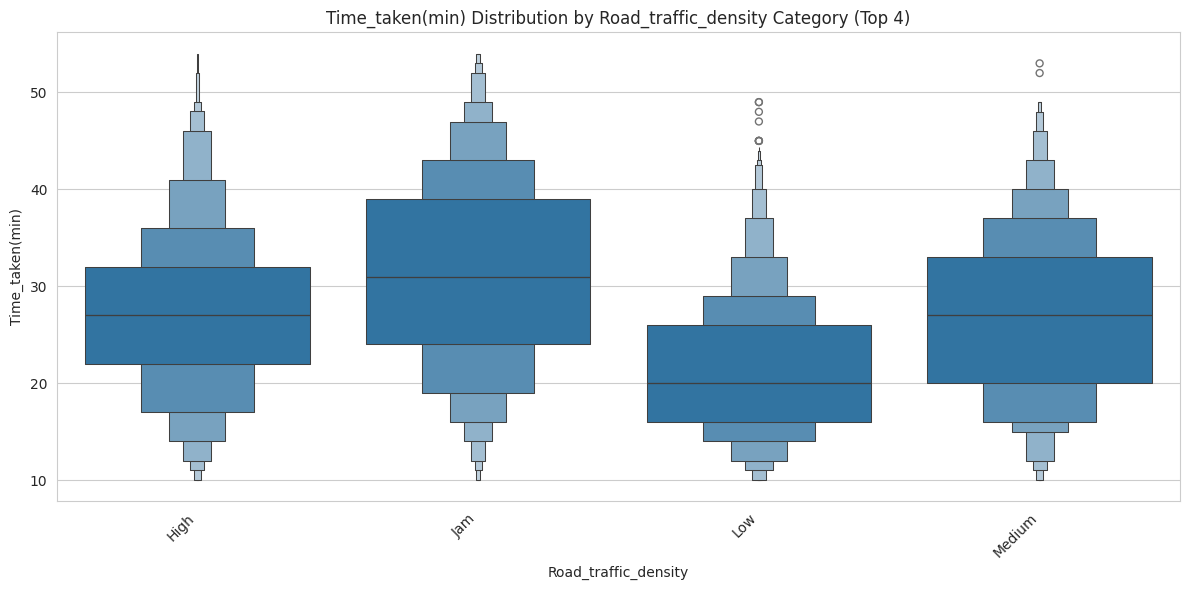

In [174]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','Road_traffic_density')


--- Bivariate Analysis: Time_taken(min) by Type_of_order ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 1.170, p-value: 3.195e-01
-> INSIGHT: There is **no significant difference** in Time_taken(min) means/medians across categories.

Grouped Mean, Median, and Std Dev of Time_taken(min):
                    mean  median       std
Type_of_order                             
Meal            26.41927    26.0  9.424849
Snack          26.286309    26.0  9.399147
Buffet         26.283511    26.0  9.411344
Drinks         26.187953    25.0  9.298465


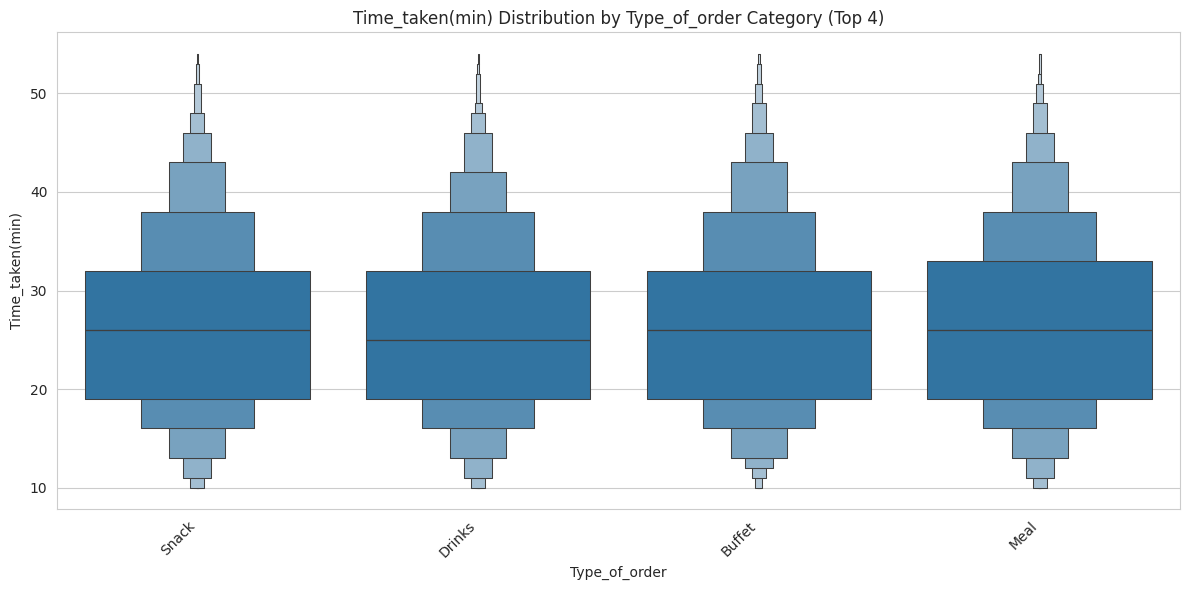

In [175]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','Type_of_order')


--- Bivariate Analysis: Time_taken(min) by Type_of_vehicle ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 421.686, p-value: 3.060e-270
-> INSIGHT: The mean/median of **Time_taken(min)** is **significantly different** across the categories of **Type_of_vehicle** (Reject H0).

Grouped Mean, Median, and Std Dev of Time_taken(min):
                       mean  median       std
Type_of_vehicle                              
Motorcycle        27.605674    26.0  9.647811
Bicycle           26.426471    26.0  9.262855
Scooter           24.480754    24.0  8.704238
Electric_Scooter   24.47011    24.0  8.610859


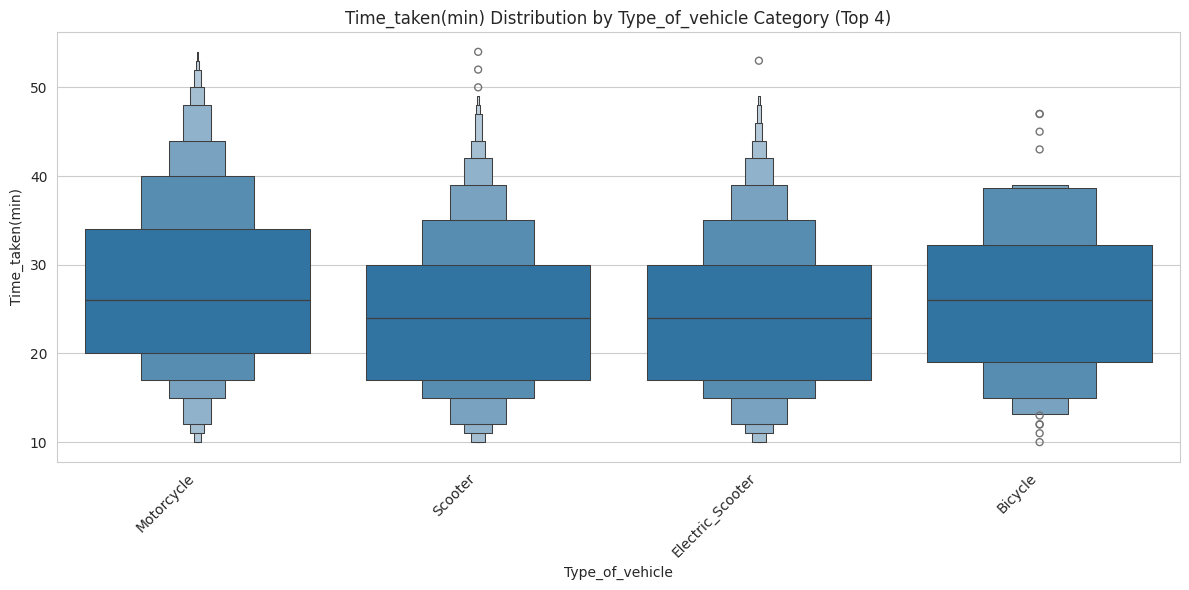

In [176]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','Type_of_vehicle')


--- Bivariate Analysis: Time_taken(min) by Festival ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 4122.657, p-value: 0.000e+00
-> INSIGHT: The mean/median of **Time_taken(min)** is **significantly different** across the categories of **Festival** (Reject H0).

Grouped Mean, Median, and Std Dev of Time_taken(min):
               mean  median       std
Festival                             
Yes       45.326304    45.0  4.745064
No        25.910924    25.0  9.051416


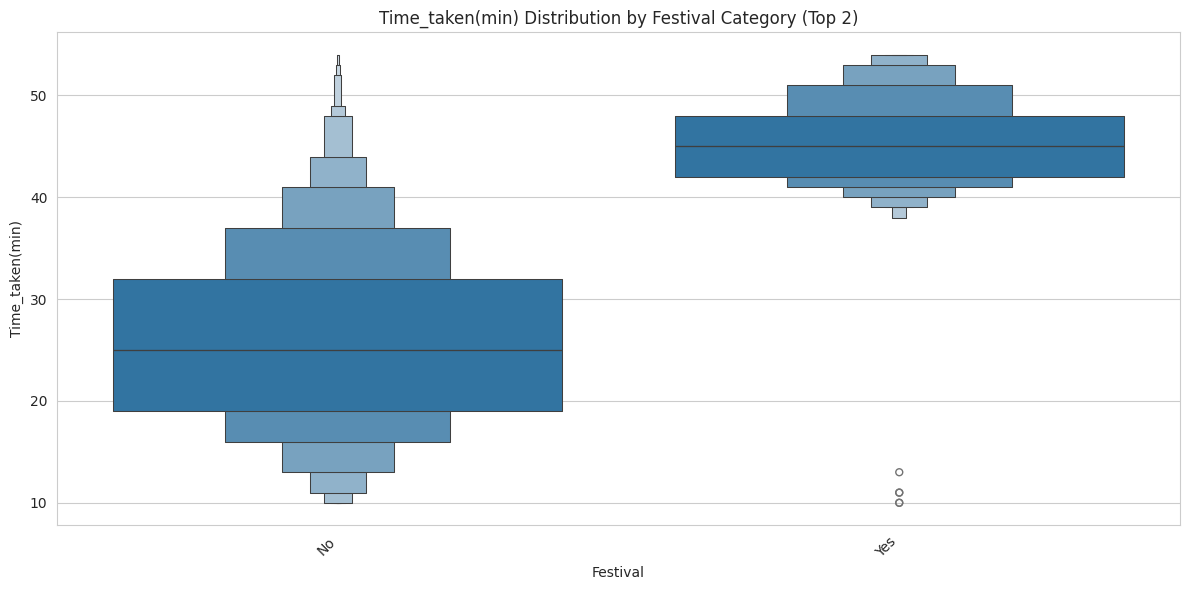

In [177]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','Festival')


--- Bivariate Analysis: Time_taken(min) by City ---

Statistical Test: One-way ANOVA
F-statistic/H-statistic: 1385.158, p-value: 0.000e+00
-> INSIGHT: The mean/median of **Time_taken(min)** is **significantly different** across the categories of **City** (Reject H0).

Grouped Mean, Median, and Std Dev of Time_taken(min):
                    mean  median       std
City                                      
Semi-Urban     48.952381    49.0   5.70514
Metropolitian  27.180356    26.0  9.198228
Urban          22.954519    22.0  8.858668


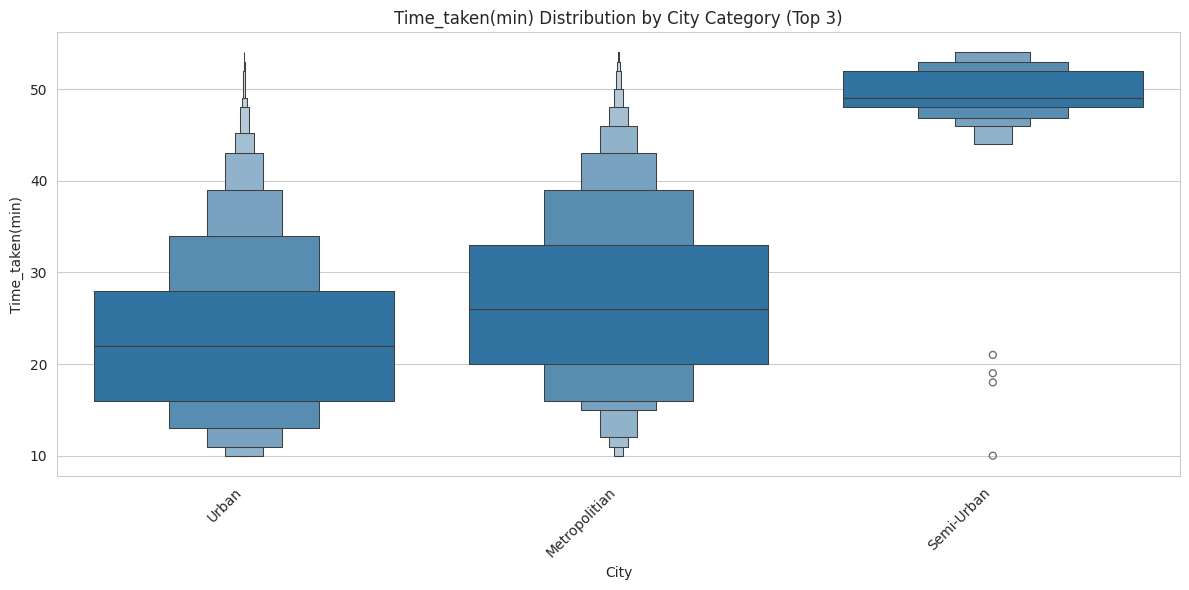

In [178]:
bivariate_num_vs_cat(df_clean,'Time_taken(min)','City')


--- Bivariate Analysis: Time_taken(min) vs Delivery_person_Age ---

Pearson Correlation (r): 0.293, p-value: 0.000e+00 (N=45593)
-> INSIGHT: There is a **significant, weak positive linear relationship** between Time_taken(min) and Delivery_person_Age.

[INFO] Using Hexbin plot for efficient visualization of dense data.


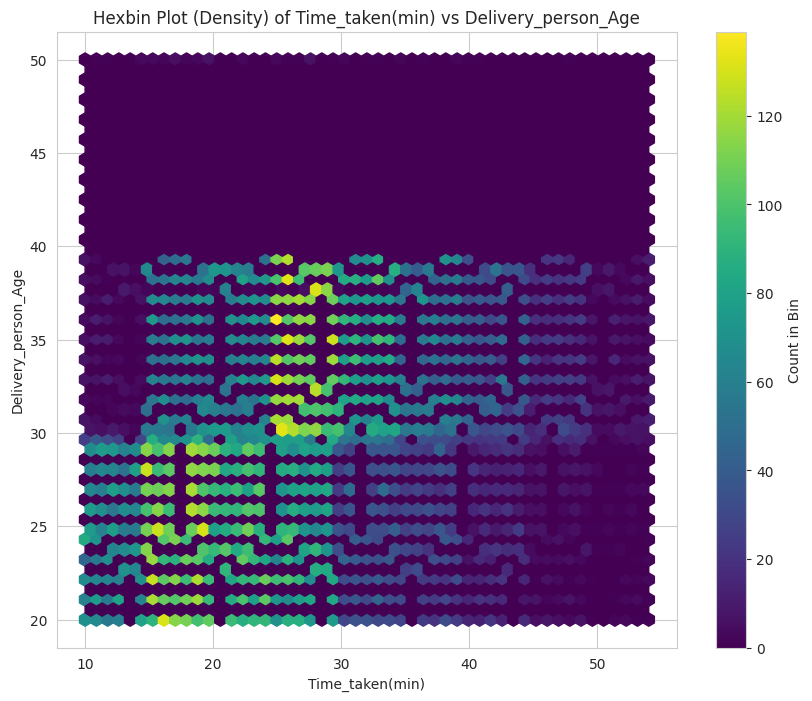

--------------------------------------------------


In [180]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Delivery_person_Age')


--- Bivariate Analysis: Time_taken(min) vs Delivery_person_Age ---

Pearson Correlation (r): 0.293, p-value: 0.000e+00 (N=45593)
-> INSIGHT: There is a **significant, weak positive linear relationship** between Time_taken(min) and Delivery_person_Age.

[INFO] Using Hexbin plot for efficient visualization of dense data.


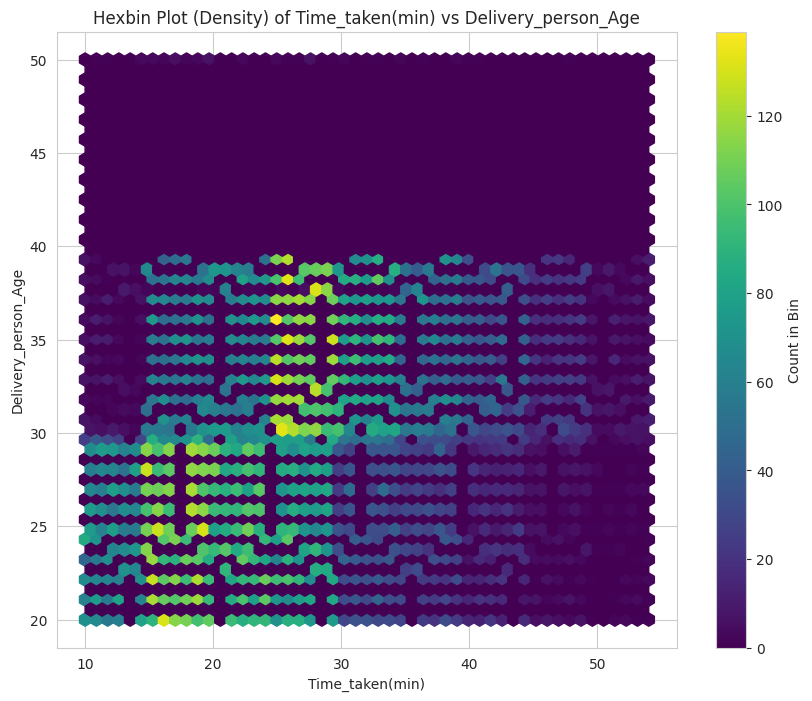

--------------------------------------------------


In [181]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Delivery_person_Age')


--- Bivariate Analysis: Time_taken(min) vs Delivery_person_Ratings ---

Pearson Correlation (r): -0.333, p-value: 0.000e+00 (N=45593)
-> INSIGHT: There is a **significant, moderate negative linear relationship** between Time_taken(min) and Delivery_person_Ratings.

[INFO] Using Hexbin plot for efficient visualization of dense data.


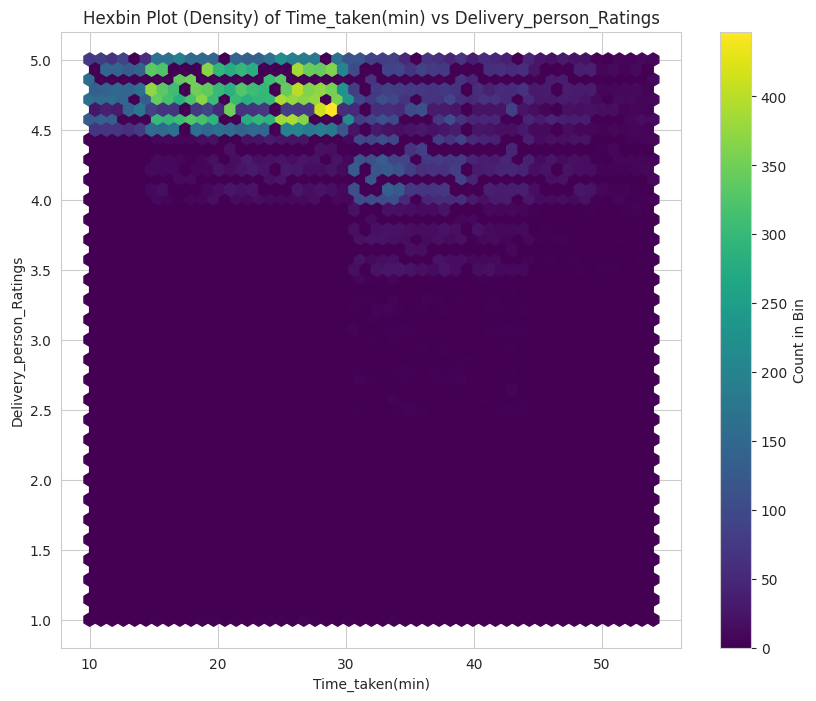

--------------------------------------------------


In [182]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Delivery_person_Ratings')


--- Bivariate Analysis: Time_taken(min) vs Restaurant_latitude ---

Pearson Correlation (r): 0.012, p-value: 1.253e-02 (N=45593)
-> INSIGHT: There is a **significant, weak positive linear relationship** between Time_taken(min) and Restaurant_latitude.

[INFO] Using Hexbin plot for efficient visualization of dense data.


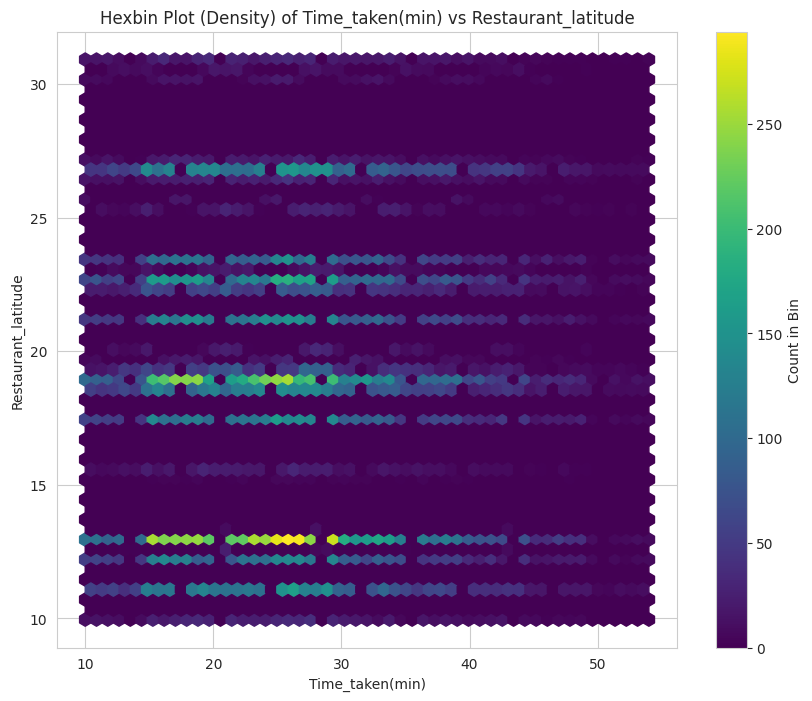

--------------------------------------------------


In [183]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Restaurant_latitude')


--- Bivariate Analysis: Time_taken(min) vs Restaurant_longitude ---

Pearson Correlation (r): 0.006, p-value: 1.705e-01 (N=45593)
-> INSIGHT: **No statistically significant linear relationship** found between Time_taken(min) and Restaurant_longitude.

[INFO] Using Hexbin plot for efficient visualization of dense data.


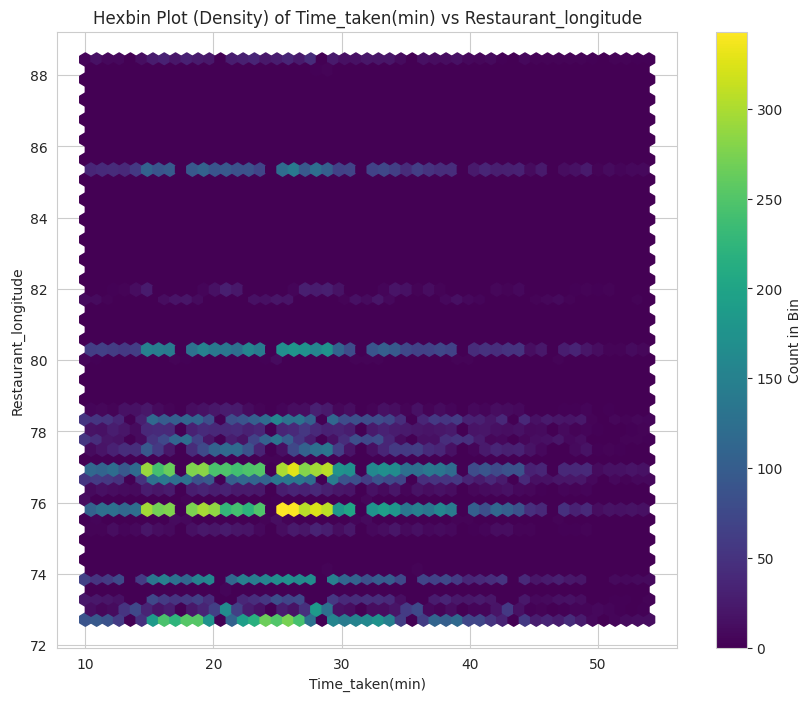

--------------------------------------------------


In [184]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Restaurant_longitude')


--- Bivariate Analysis: Time_taken(min) vs Delivery_location_latitude ---

Pearson Correlation (r): 0.014, p-value: 3.334e-03 (N=45593)
-> INSIGHT: There is a **significant, weak positive linear relationship** between Time_taken(min) and Delivery_location_latitude.

[INFO] Using Hexbin plot for efficient visualization of dense data.


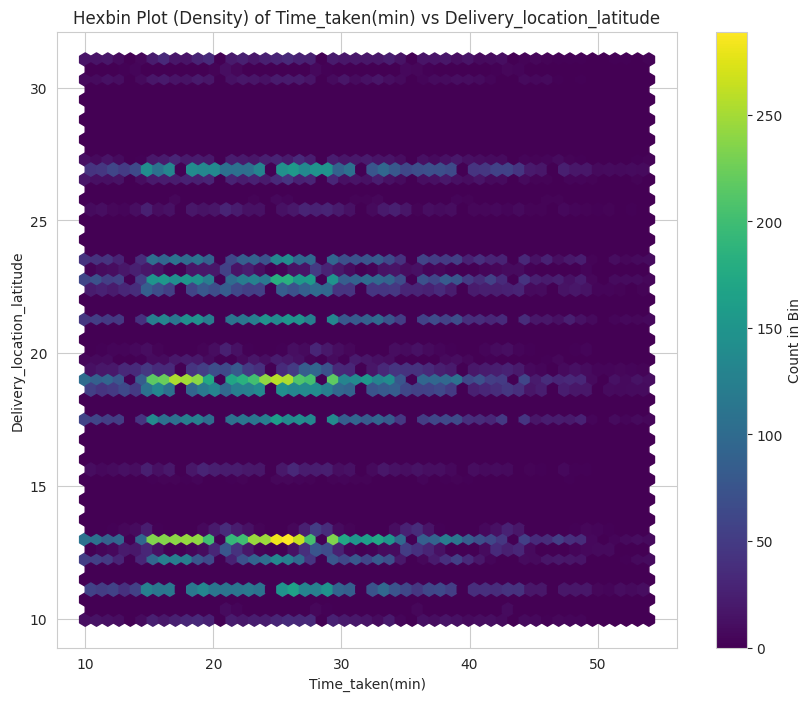

--------------------------------------------------


In [185]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Delivery_location_latitude')


--- Bivariate Analysis: Time_taken(min) vs Delivery_location_longitude ---

Pearson Correlation (r): 0.010, p-value: 3.977e-02 (N=45593)
-> INSIGHT: There is a **significant, weak positive linear relationship** between Time_taken(min) and Delivery_location_longitude.

[INFO] Using Hexbin plot for efficient visualization of dense data.


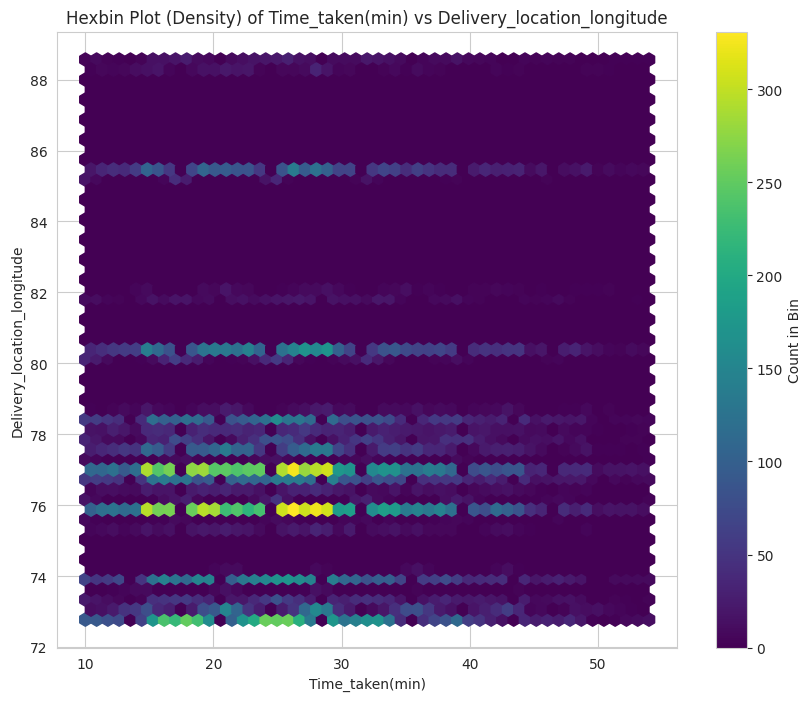

--------------------------------------------------


In [186]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Delivery_location_longitude')


--- Bivariate Analysis: Time_taken(min) vs Vehicle_condition ---

Pearson Correlation (r): -0.234, p-value: 0.000e+00 (N=45593)
-> INSIGHT: There is a **significant, weak negative linear relationship** between Time_taken(min) and Vehicle_condition.

[INFO] Using Hexbin plot for efficient visualization of dense data.


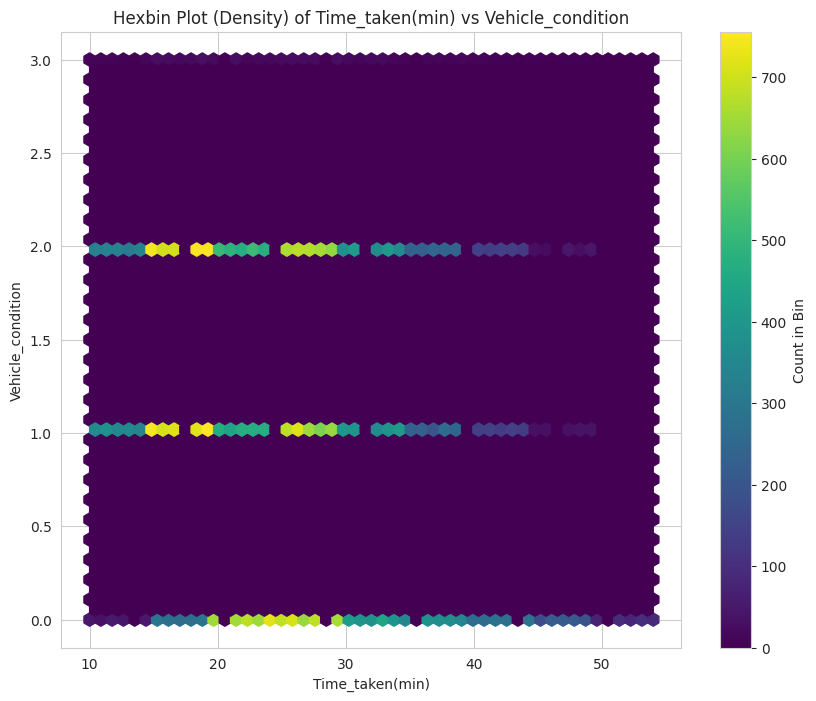

--------------------------------------------------


In [187]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','Vehicle_condition')


--- Bivariate Analysis: Time_taken(min) vs multiple_deliveries ---

Pearson Correlation (r): 0.378, p-value: 0.000e+00 (N=45593)
-> INSIGHT: There is a **significant, moderate positive linear relationship** between Time_taken(min) and multiple_deliveries.

[INFO] Using Hexbin plot for efficient visualization of dense data.


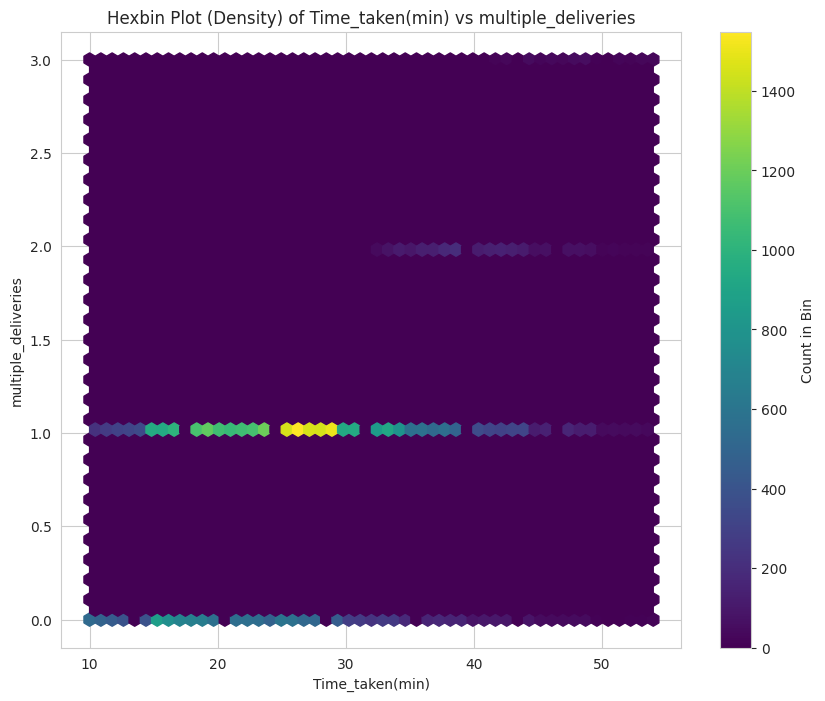

--------------------------------------------------


In [188]:
bivariate_num_vs_num(df_clean,'Time_taken(min)','multiple_deliveries')


--- Bivariate Analysis: Weatherconditions vs Road_traffic_density ---

Chi-Squared Test: Chi2=16.406, p-value=3.556e-01, DOF=15
-> INSIGHT: **Weatherconditions** and **Road_traffic_density** appear to be statistically independent.


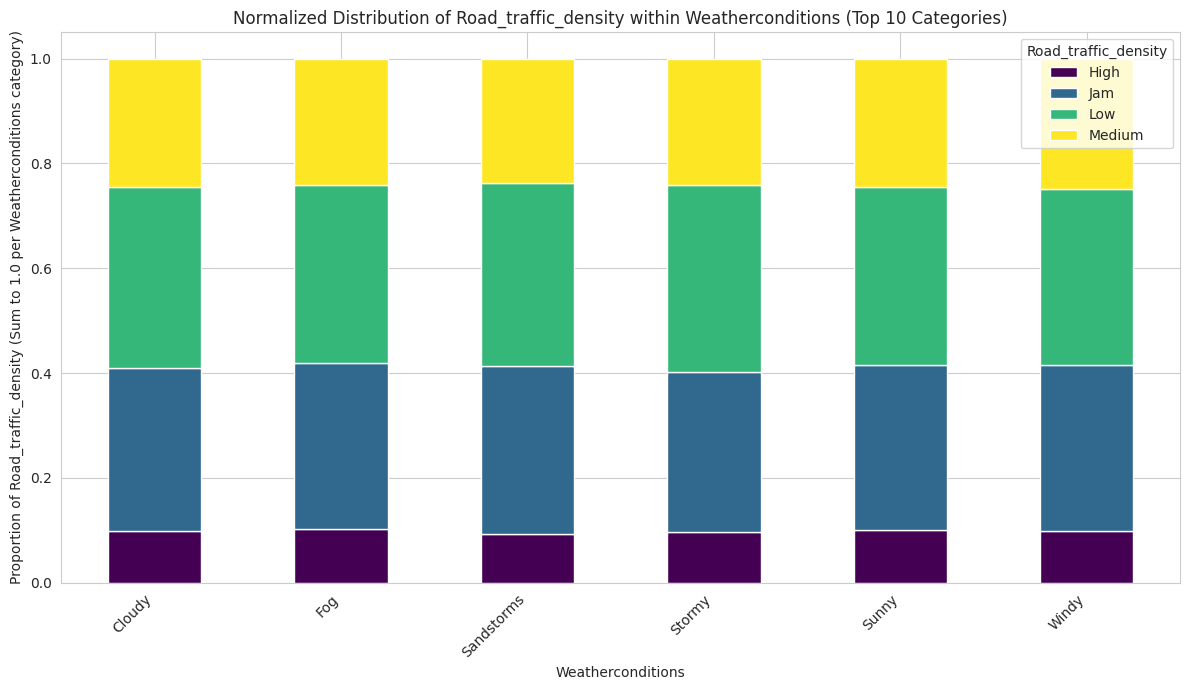


Crosstab (Raw Counts, Top 10x10):
Road_traffic_density  High   Jam   Low  Medium
Weatherconditions                             
Cloudy                 751  2384  2641    1866
Fog                    793  2461  2638    1879
Sandstorms             707  2439  2642    1811
Stormy                 741  2347  2736    1855
Sunny                  743  2327  2505    1805
Windy                  741  2388  2514    1879


In [189]:
bivariate_cat_vs_cat(df_clean,'Weatherconditions','Road_traffic_density')


--- Bivariate Analysis: Type_of_order vs Type_of_vehicle ---

Chi-Squared Test: Chi2=5.173, p-value=8.190e-01, DOF=9
-> INSIGHT: **Type_of_order** and **Type_of_vehicle** appear to be statistically independent.


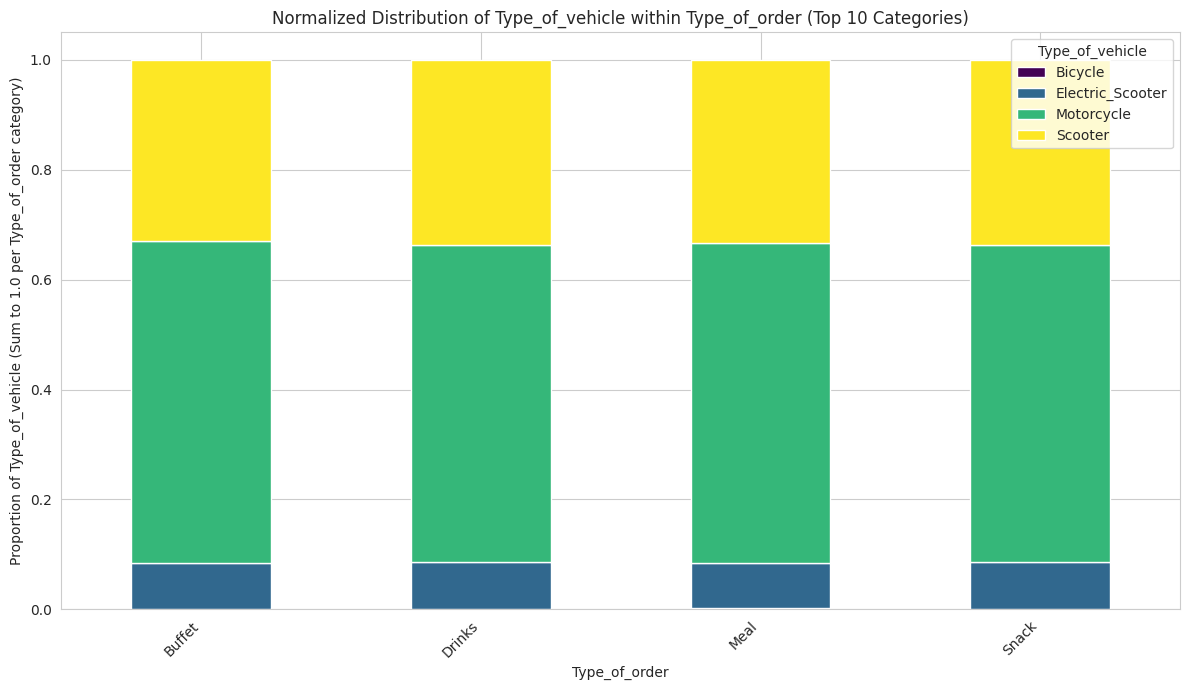


Crosstab (Raw Counts, Top 10x10):
Type_of_vehicle  Bicycle  Electric_Scooter  Motorcycle  Scooter
Type_of_order                                                  
Buffet                15               943        6595     3727
Drinks                16               949        6532     3825
Meal                  23               948        6657     3830
Snack                 14               974        6651     3894


In [190]:
bivariate_cat_vs_cat(df_clean,'Type_of_order','Type_of_vehicle')



--- Bivariate Analysis: Festival vs Road_traffic_density ---

Chi-Squared Test: Chi2=708.189, p-value=3.518e-153, DOF=3
-> INSIGHT: There is a **statistically significant association** between **Festival** and **Road_traffic_density** (Reject H0).


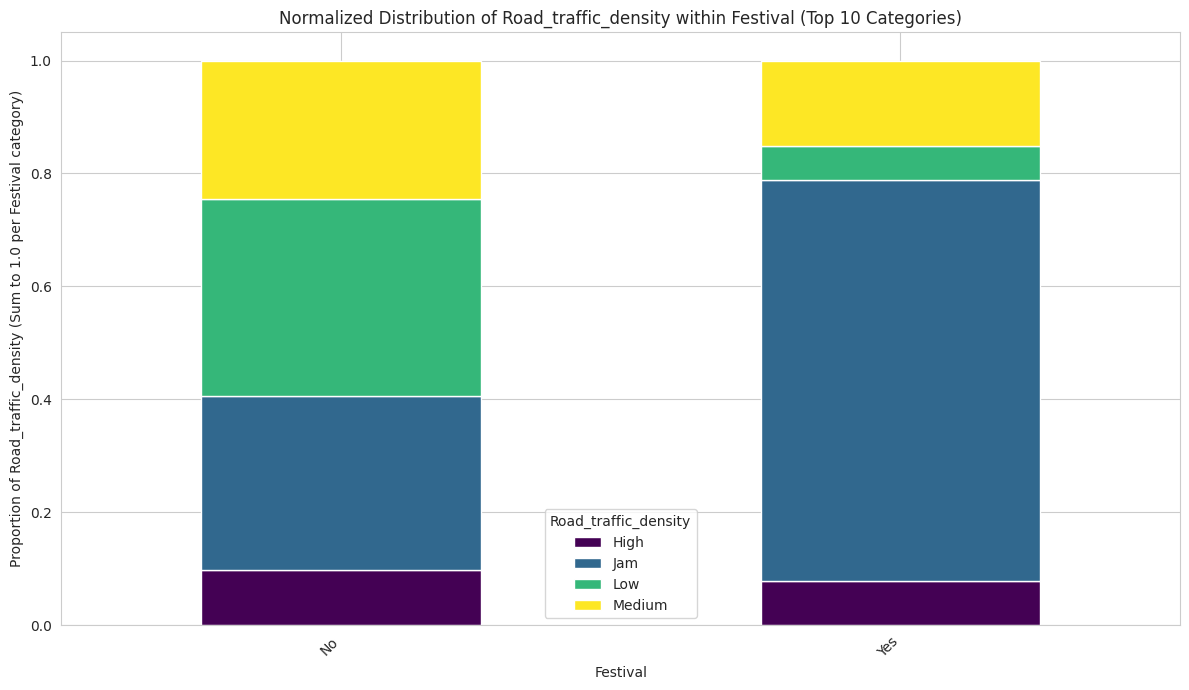


Crosstab (Raw Counts, Top 10x10):
Road_traffic_density  High    Jam    Low  Medium
Festival                                        
No                    4406  13706  15622   10958
Yes                     70    640     54     137


In [191]:
bivariate_cat_vs_cat(df_clean,'Festival','Road_traffic_density')



--- Bivariate Analysis: City vs Road_traffic_density ---

Chi-Squared Test: Chi2=492.380, p-value=3.682e-103, DOF=6
-> INSIGHT: There is a **statistically significant association** between **City** and **Road_traffic_density** (Reject H0).


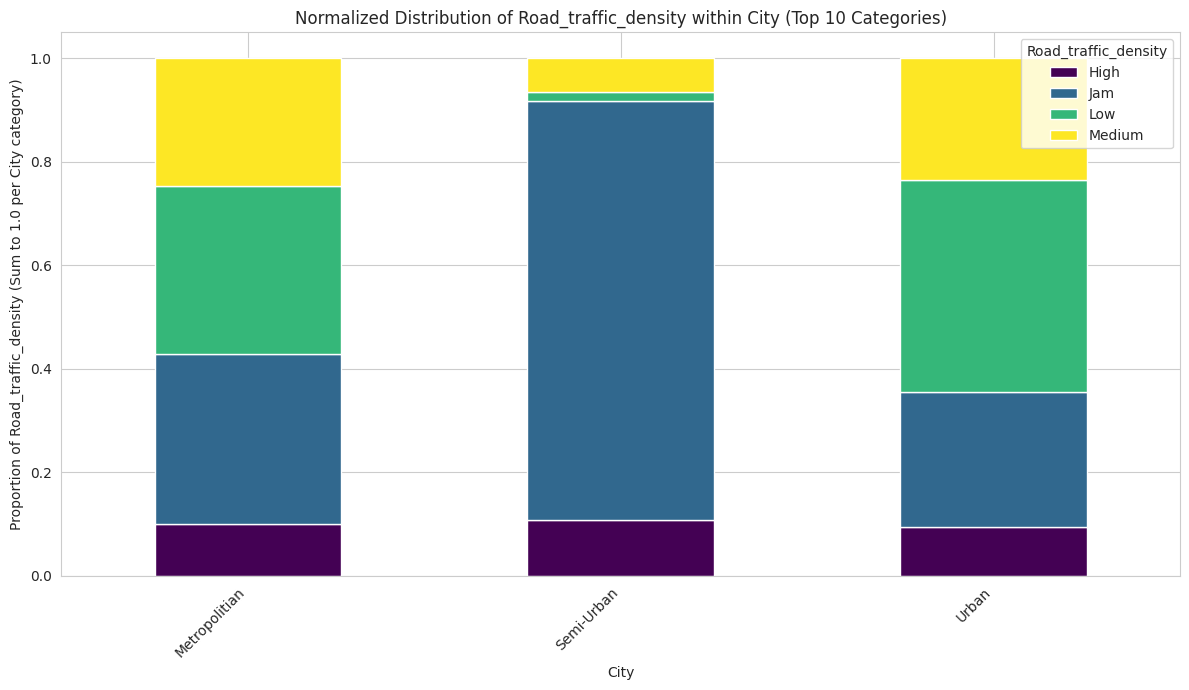


Crosstab (Raw Counts, Top 10x10):
Road_traffic_density  High    Jam    Low  Medium
City                                            
Metropolitian         3478  11491  11403    8631
Semi-Urban              18    136      3      11
Urban                  980   2719   4270    2453


In [192]:
bivariate_cat_vs_cat(df_clean,'City','Road_traffic_density')



--- Bivariate Analysis: Weatherconditions vs City ---

Chi-Squared Test: Chi2=130.773, p-value=3.249e-23, DOF=10
-> INSIGHT: There is a **statistically significant association** between **Weatherconditions** and **City** (Reject H0).


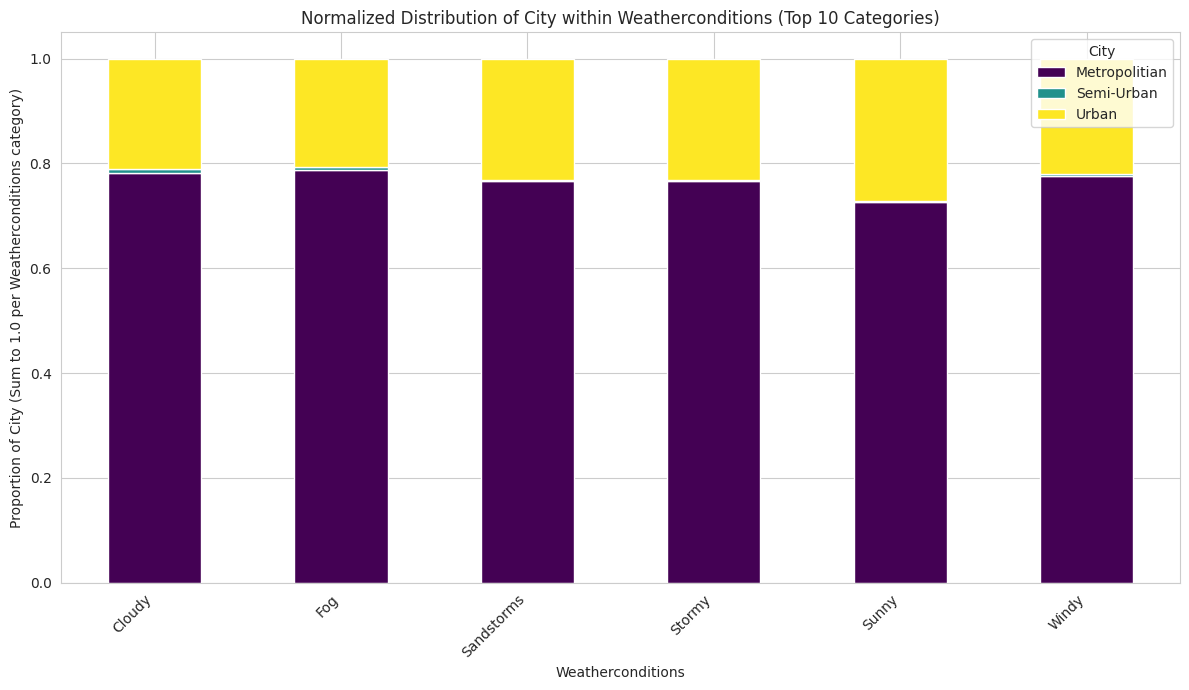


Crosstab (Raw Counts, Top 10x10):
City               Metropolitian  Semi-Urban  Urban
Weatherconditions                                  
Cloudy                      5978          48   1616
Fog                         6125          33   1613
Sandstorms                  5818          22   1759
Stormy                      5881          21   1777
Sunny                       5358          20   2002
Windy                       5843          24   1655


In [193]:
bivariate_cat_vs_cat(df_clean,'Weatherconditions','City')



--- Bivariate Analysis: Festival vs Type_of_order ---

Chi-Squared Test: Chi2=2.096, p-value=5.527e-01, DOF=3
-> INSIGHT: **Festival** and **Type_of_order** appear to be statistically independent.


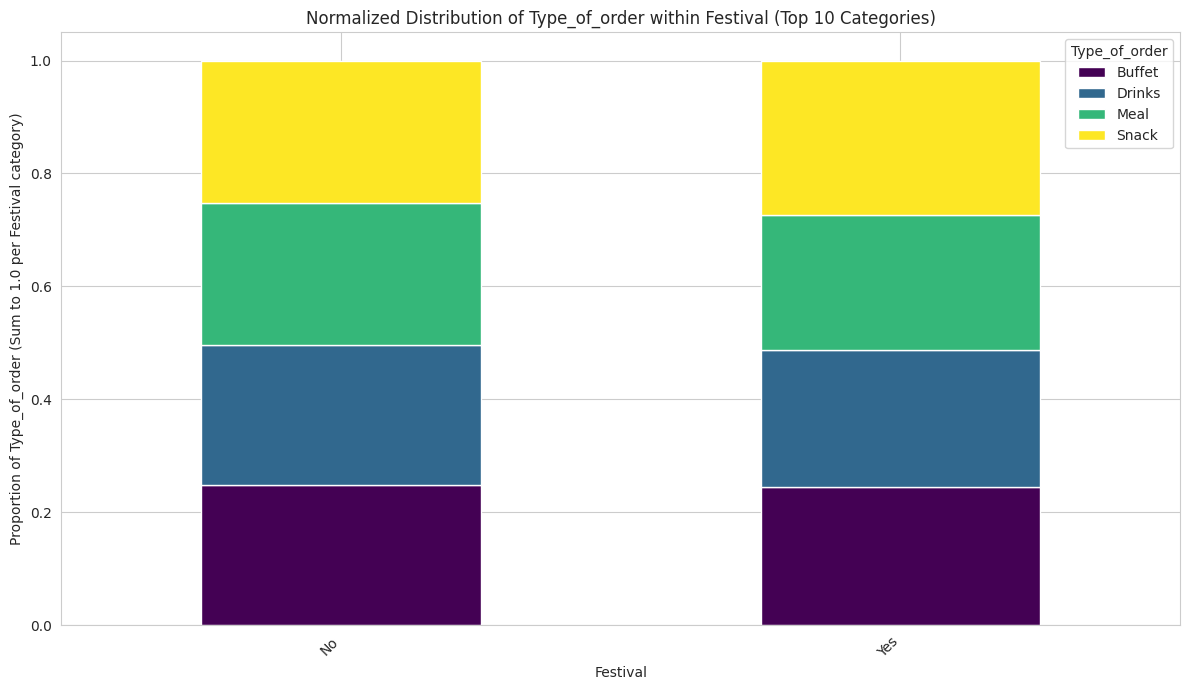


Crosstab (Raw Counts, Top 10x10):
Type_of_order  Buffet  Drinks   Meal  Snack
Festival                                   
No              11060   11103  11242  11287
Yes               220     219    216    246


In [194]:
bivariate_cat_vs_cat(df_clean,'Festival','Type_of_order')



--- Multivariate Analysis: Correlation and Interactions ---

1. Correlation Heatmap:


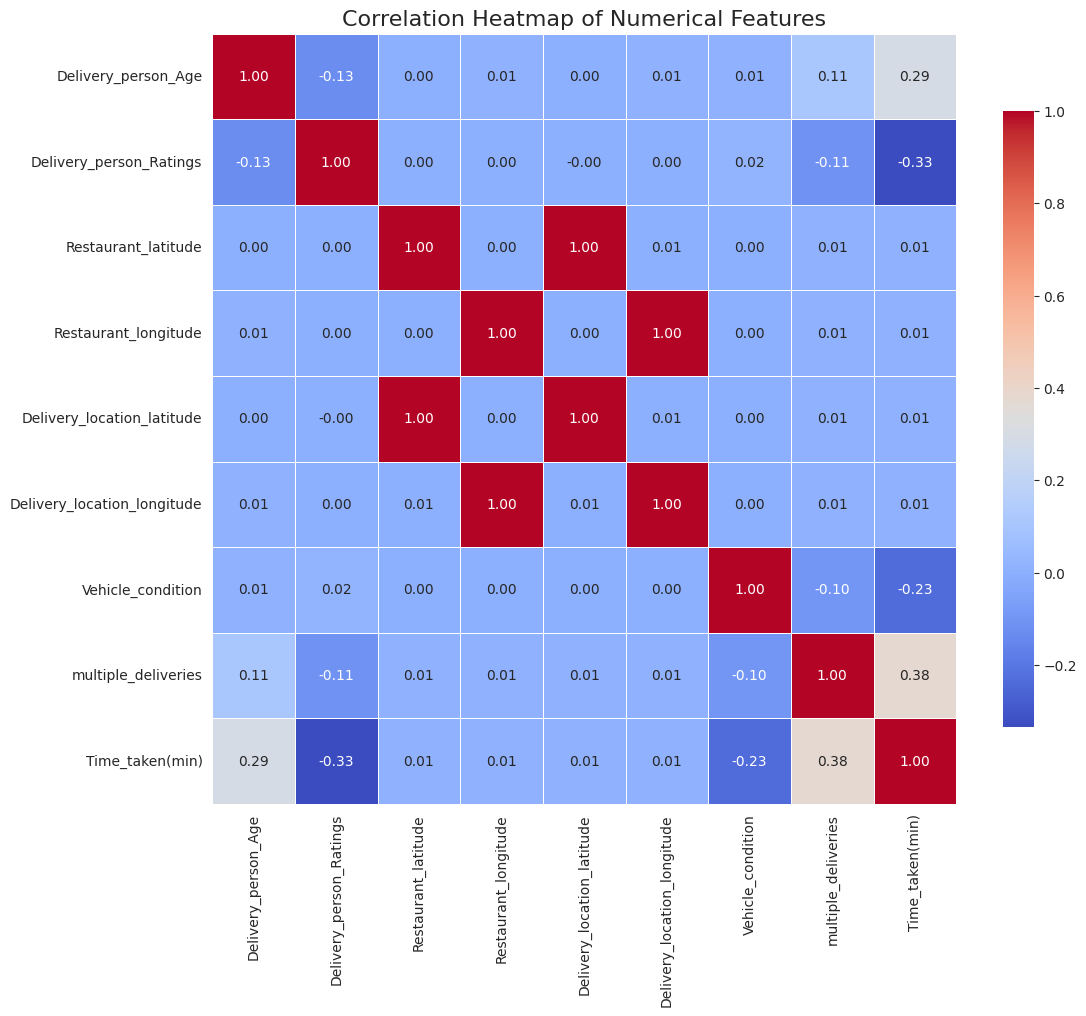


-> INSIGHT: High Multicollinearity Detected (Corr >= 0.7):
   - Restaurant_latitude vs Delivery_location_latitude: r=1.00. Consider dropping one for modeling.
   - Restaurant_longitude vs Delivery_location_longitude: r=1.00. Consider dropping one for modeling.

[WARNING] Skipping full Pair Plot. Too many features (9).


In [195]:
multivariate_analysis(df_clean, num_cols)